# Exploración aquí:

Análisis De Datos Exploratorios:

In [65]:
# - Importación de librerías:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# - Importación del set de datos:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# - Guardado:

rutg = '../data/raw/dataset.csv'

# - Lectura:

df = pd.read_csv(url, delimiter=',')
df.to_csv(rutg, index=False)
print("El archivo fue guardado en la ruta:", rutg)

# - Vista previa:

df

El archivo fue guardado en la ruta: ../data/raw/dataset.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


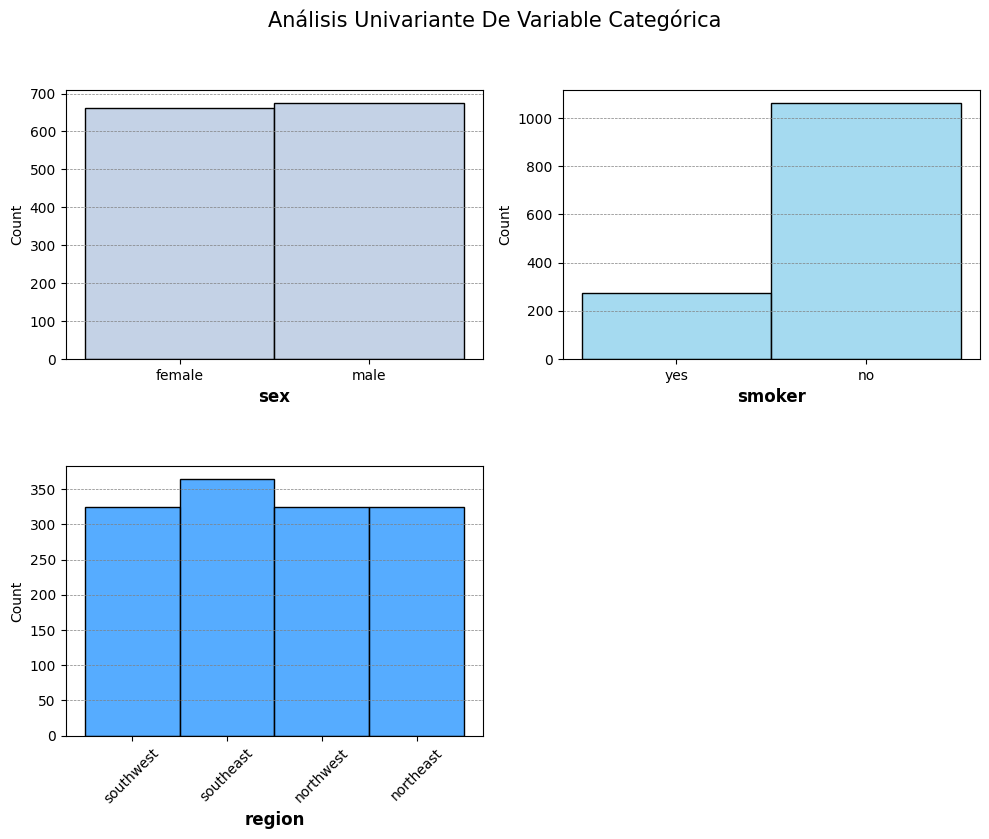

In [67]:
# - Parámetros:

fig, axis = plt.subplots(2, 2, figsize=(10, 8))

# - Título:

fig.suptitle("Análisis Univariante De Variable Categórica", fontsize=15)

# - Distribución:

sns.histplot(ax=axis[0, 0], data=df, x='sex', color='lightsteelblue')
sns.histplot(ax=axis[0, 1], data=df, x='smoker', color='skyblue')
sns.histplot(ax=axis[1, 0], data=df, x='region', color='dodgerblue')

# - Visualización:

axis[1, 1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.4)

for ax in axis.flat:
    if ax.has_data():
        ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
        x_labels = ax.get_xticklabels()
        if len(x_labels) > 3:
            for label in x_labels:
                label.set_rotation(45)
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')

plt.show()

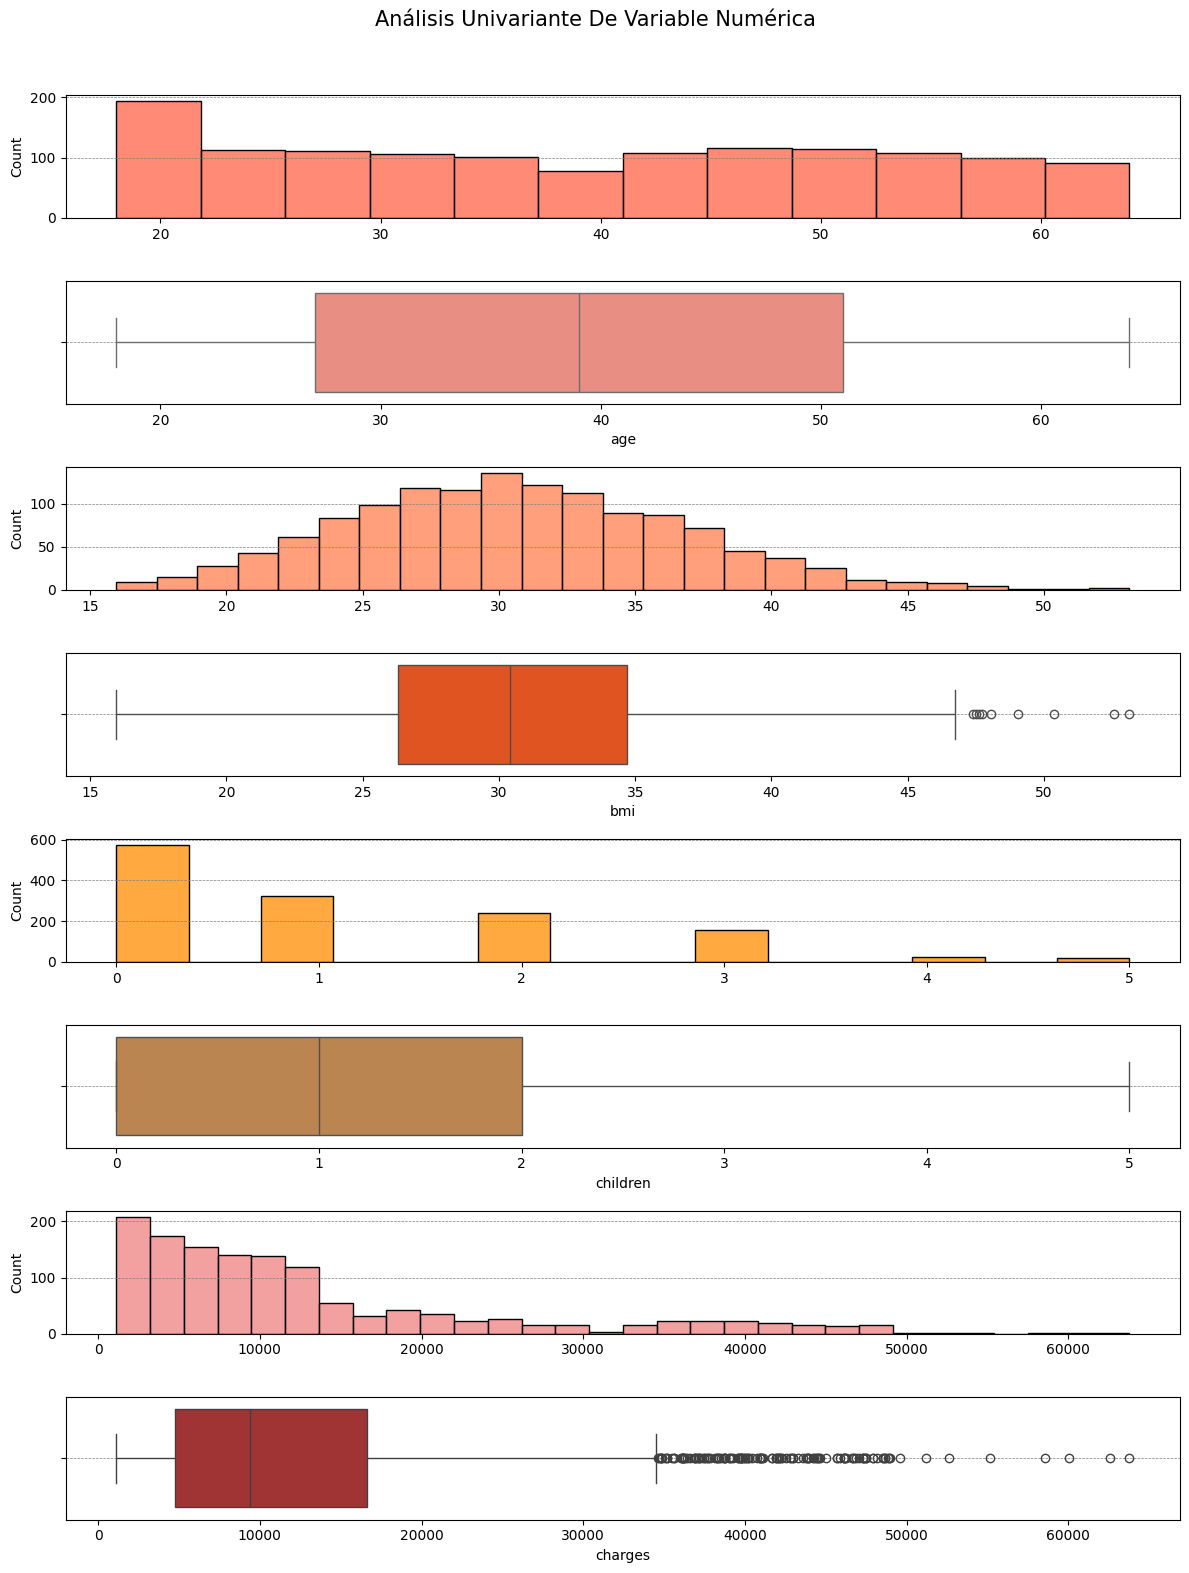

In [68]:
# - Parámetros:

fig, axis = plt.subplots(8, 1, figsize=(12, 16))
fig.suptitle("Análisis Univariante De Variable Numérica", fontsize=15)

# - Lista De Variables:

variables = [
    ("age", "tomato", "salmon"),
    ("bmi", "coral", "orangered"),
    ("children", "darkorange", "peru"),
    ("charges", "lightcoral", "firebrick"),
]

# - Gráficos:

for i, (var, hist_color, box_color) in enumerate(variables):
    sns.histplot(ax=axis[2*i], data=df, x=var, color=hist_color).set(xlabel=None)
    sns.boxplot(ax=axis[2*i + 1], data=df, x=var, color=box_color)

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.96])
for ax in axis.flat:
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.show()

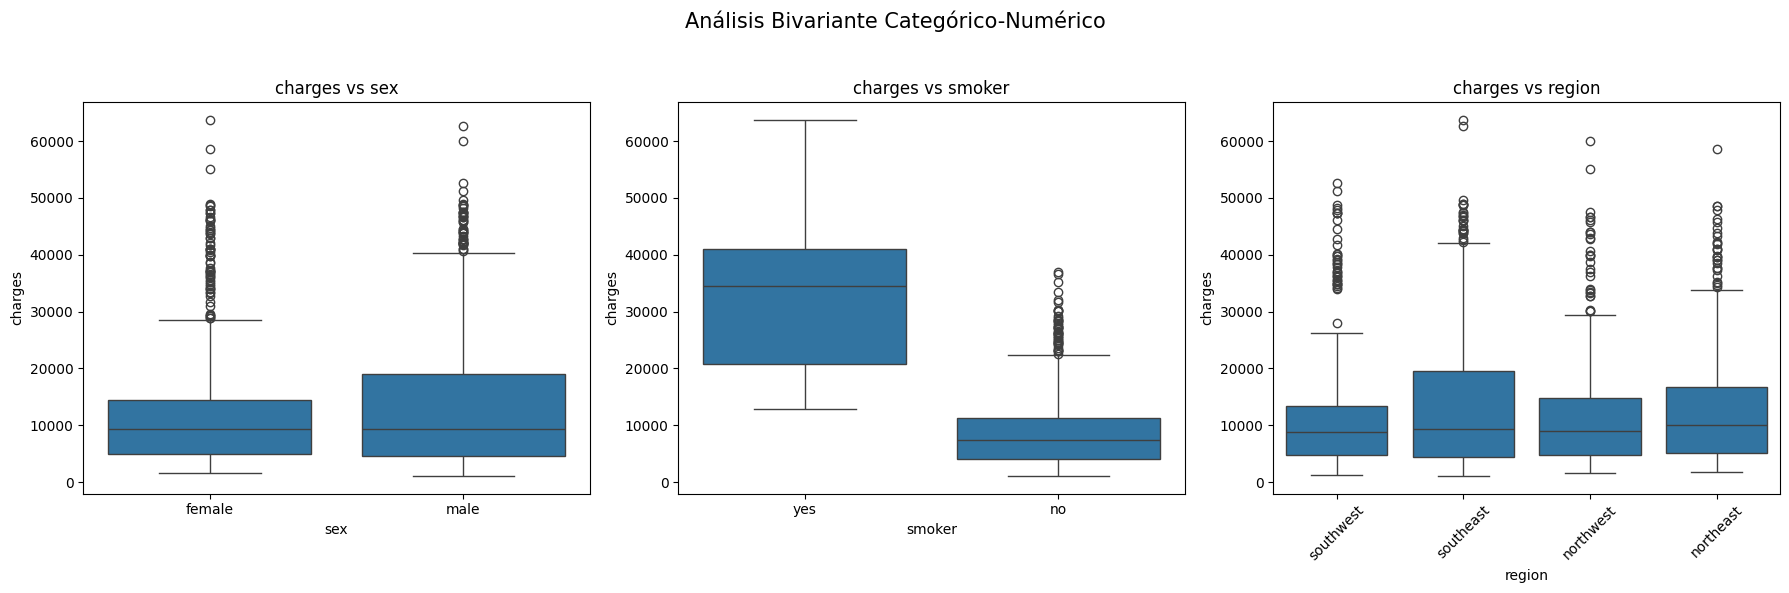

In [69]:
# - Parámetros:

fig, axis = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Análisis Bivariante Categórico-Numérico", fontsize=15)

# - Gráficos:

sns.boxplot(ax=axis[0], data=df, x="sex", y="charges")
axis[0].set_title("charges vs sex")

sns.boxplot(ax=axis[1], data=df, x="smoker", y="charges")
axis[1].set_title("charges vs smoker")

sns.boxplot(ax=axis[2], data=df, x="region", y="charges")
axis[2].set_title("charges vs region")
axis[2].tick_params(axis='x', rotation=45)

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

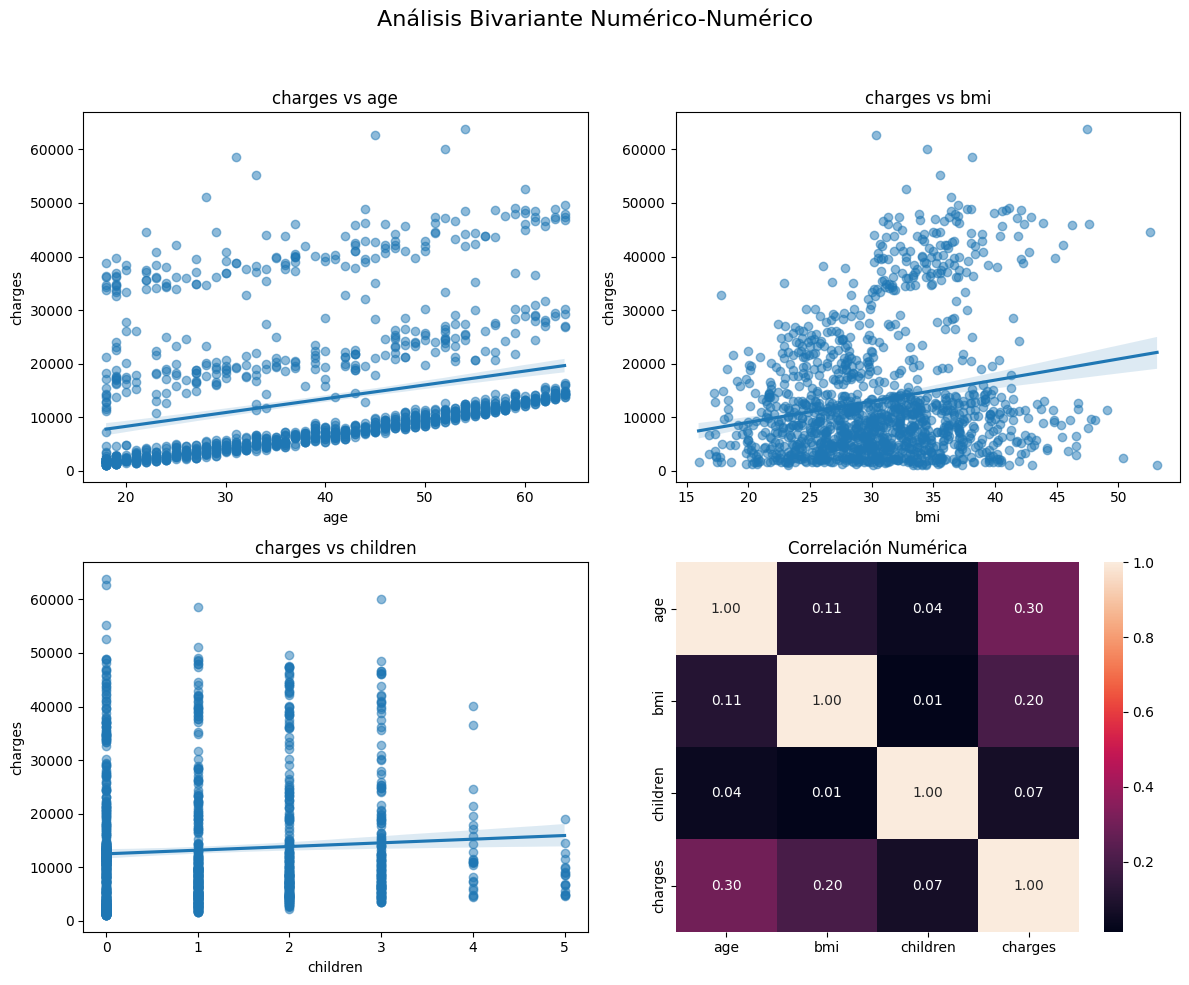

In [ ]:
# - Parámetros:

fig, axis = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Análisis Bivariante Numérico-Numérico", fontsize=16)

# - Distribución:

sns.regplot(ax=axis[0, 0], data=df, x="age", y="charges", scatter_kws={'alpha':0.5})
axis[0, 0].set_title("charges vs age")
sns.regplot(ax=axis[0, 1], data=df, x="bmi", y="charges", scatter_kws={'alpha':0.5})
axis[0, 1].set_title("charges vs bmi")
sns.regplot(ax=axis[1, 0], data=df, x="children", y="charges", scatter_kws={'alpha':0.5})
axis[1, 0].set_title("charges vs children")
num_vars = ["age", "bmi", "children", "charges"]
sns.heatmap(df[num_vars].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_title("Correlación Numérica")

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

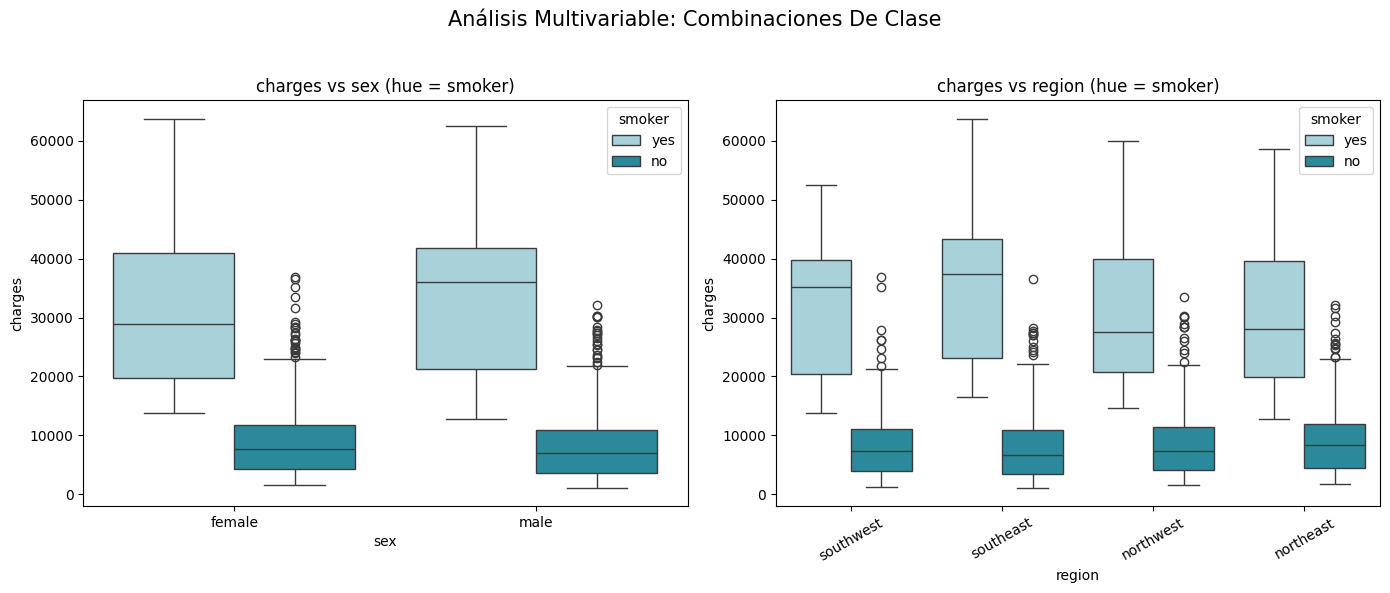

In [71]:
# - Parámetros:

fig, axis = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Análisis Multivariable: Combinaciones De Clase", fontsize=15)
palette = ["#a1d6e2", "#1995ad"]

# - Distribución:

sns.boxplot(ax=axis[0], data=df, x="sex", y="charges", hue="smoker", palette=palette)
axis[0].set_title("charges vs sex (hue = smoker)")
sns.boxplot(ax=axis[1], data=df, x="region", y="charges", hue="smoker", palette=palette)
axis[1].set_title("charges vs region (hue = smoker)")
axis[1].tick_params(axis='x', rotation=30)

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

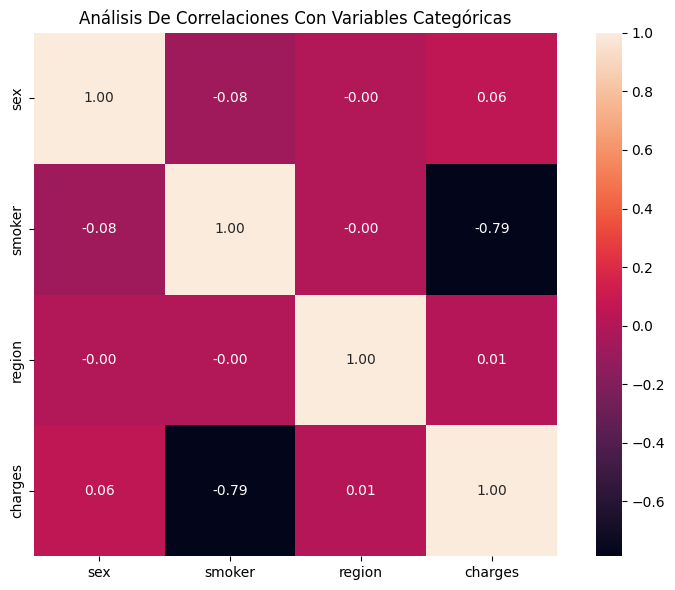

In [72]:
# - Factorización:

df = df.copy()
df["sex"] = pd.factorize(df["sex"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
df["region"] = pd.factorize(df["region"])[0]

# - Análisis De Correlación:

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    df[["sex", "smoker", "region", "charges"]].corr(),
    annot=True, fmt=".2f", square=True
)

# - Visualización:

plt.title("Análisis De Correlaciones Con Variables Categóricas")
plt.tight_layout()
plt.show()

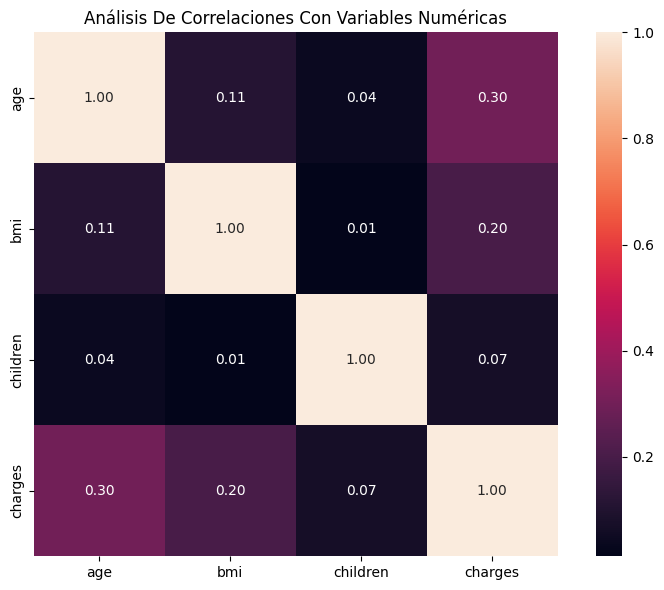

In [73]:
# - Análisis De Correlación:

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    df[["age", "bmi", "children", "charges"]].corr(),
    annot=True, fmt=".2f", square=True
)

# - Visualización:

plt.title("Análisis De Correlaciones Con Variables Numéricas")
plt.tight_layout()
plt.show()

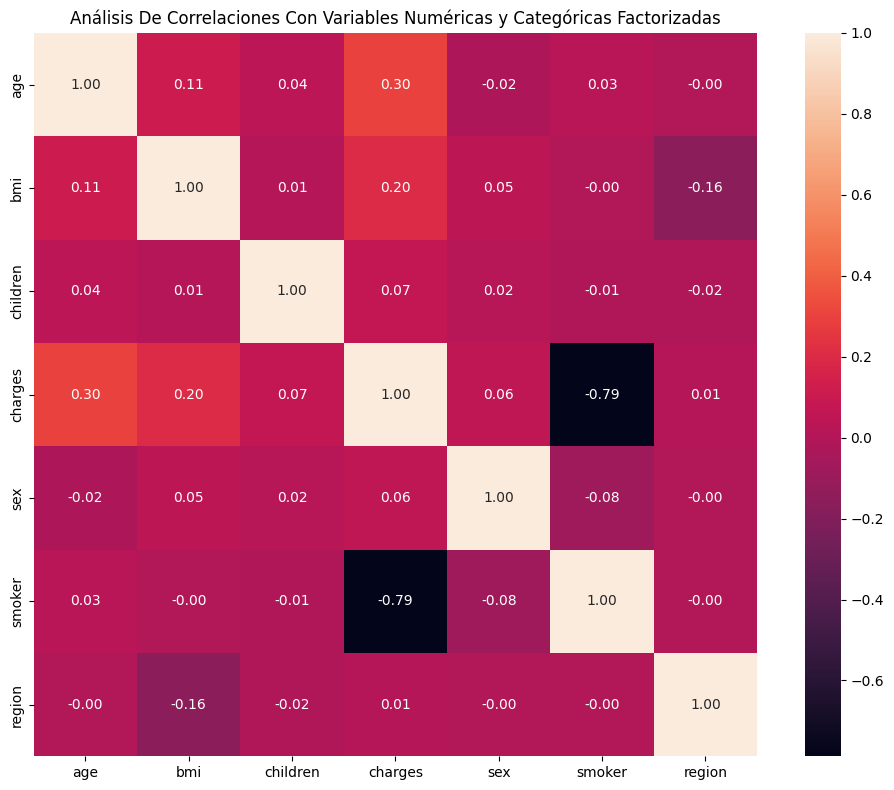

In [74]:
# - Distribución:

variables = [
    "age", "bmi", "children", "charges",  # Numéricas
    "sex", "smoker", "region"              # Categóricas ya factorizadas
]

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    df[variables].corr(),
    annot=True, fmt=".2f", square=True
)

# - Visualización:

plt.title("Análisis De Correlaciones Con Variables Numéricas y Categóricas Factorizadas")
plt.tight_layout()
plt.show()

In [75]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


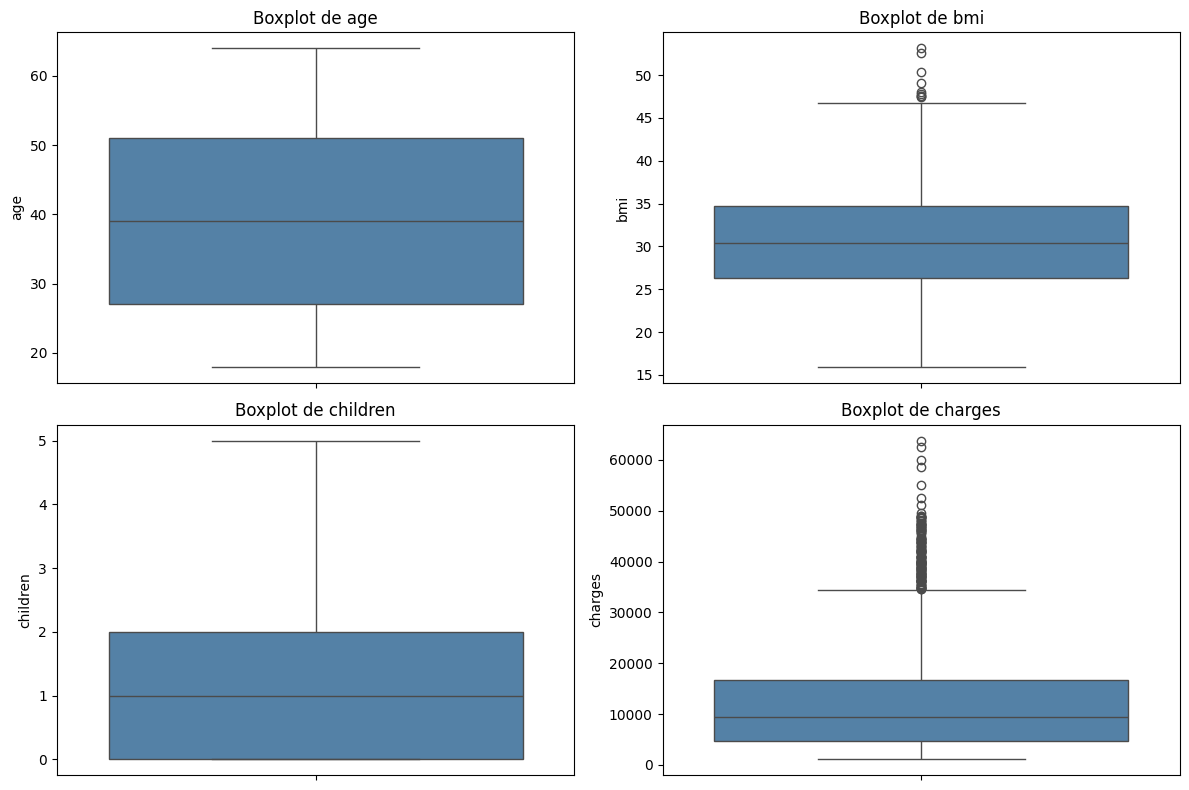

In [76]:
# - Parámetros:

fig, axis = plt.subplots(2, 2, figsize=(12, 8))
variables = ["age", "bmi", "children", "charges"]

# - Distribución (boxplots):

for idx, var in enumerate(variables):
    row, col = divmod(idx, 2)
    sns.boxplot(ax=axis[row, col], data=df, y=var, color="steelblue")
    axis[row, col].set_title(f"Boxplot de {var}", fontsize=12)

# - Visualización:

plt.tight_layout()
plt.show()

In [77]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [78]:
# - Importación De Librerías:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# - Declaración De Variables:

X = df.drop("charges", axis=1)
y = df["charges"]

# - División:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# - Escalado:

scaler = MinMaxScaler()
scaler.fit(X_train)

# - Transformación:

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=X_test.columns)

In [79]:
# - Importación De Librerías:

from sklearn.feature_selection import f_regression, SelectKBest  # f_regression ya que "charges" es numérica

# - Selección De Características:

selection_model = SelectKBest(score_func=f_regression, k=5)
selection_model.fit(X_train_scal, y_train)

# - Selección De Variables:

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns=X_train_scal.columns.values[ix], index=X_train_scal.index)

X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns=X_test_scal.columns.values[ix], index=X_test_scal.index)

In [80]:
X_train_scal

,age,sex,bmi,children,smoker,region
560,0.608696,0.0,0.107345,0.4,1.0,0.666667
1285,0.630435,0.0,0.224913,0.0,1.0,1.000000
1142,0.739130,0.0,0.239440,0.0,1.0,0.333333
969,0.456522,0.0,0.493947,1.0,1.0,0.333333
486,0.782609,0.0,0.148238,0.6,1.0,0.666667
...,...,...,...,...,...,...
1095,0.000000,0.0,0.414044,0.8,1.0,1.000000
1130,0.456522,0.0,0.212806,1.0,1.0,0.333333
1294,0.869565,1.0,0.247915,0.0,1.0,1.000000
860,0.413043,0.0,0.851224,0.4,0.0,0.000000


In [81]:
X_test_scal

,age,sex,bmi,children,smoker,region
764,0.586957,0.0,0.247915,0.4,1.0,1.000000
887,0.391304,0.0,0.378262,0.0,1.0,0.666667
890,1.000000,0.0,0.293920,0.0,0.0,0.666667
1293,0.608696,1.0,0.263250,0.6,1.0,0.666667
259,0.021739,1.0,0.429379,0.0,0.0,0.666667
...,...,...,...,...,...,...
109,0.978261,1.0,0.514662,0.0,0.0,0.333333
575,0.869565,0.0,0.301587,0.0,1.0,0.666667
535,0.434783,1.0,0.324590,0.2,1.0,1.000000
543,0.782609,0.0,0.846112,0.0,0.0,0.333333


In [82]:
X_train_scal['y'] = list(y_train)
X_test_scal['y'] = list(y_test)

In [83]:
X_train_scal.to_csv('../data/processed/clean_train_dataset.csv', index=False)
X_test_scal.to_csv('../data/processed/clean_test_dataset.csv', index=False)

Regresión Lineal:

In [84]:
train_data = pd.read_csv('../data/processed/clean_train_dataset.csv')
test_data = pd.read_csv('../data/processed/clean_test_dataset.csv')

In [85]:
train_data.head()

,age,sex,bmi,children,smoker,region,y
0,0.608696,0.0,0.107345,0.4,1.0,0.666667,9193.83850
1,0.630435,0.0,0.224913,0.0,1.0,1.000000,8534.67180
2,0.739130,0.0,0.239440,0.0,1.0,0.333333,27117.99378
3,0.456522,0.0,0.493947,1.0,1.0,0.333333,8596.82780
4,0.782609,0.0,0.148238,0.6,1.0,0.666667,12475.35130


In [86]:
test_data.head()

,age,sex,bmi,children,smoker,region,y
0,0.586957,0.0,0.247915,0.4,1.0,1.000000,9095.06825
1,0.391304,0.0,0.378262,0.0,1.0,0.666667,5272.17580
2,1.000000,0.0,0.293920,0.0,0.0,0.666667,29330.98315
3,0.608696,1.0,0.263250,0.6,1.0,0.666667,9301.89355
4,0.021739,1.0,0.429379,0.0,0.0,0.666667,33750.29180


In [87]:
X_train = train_data.drop(['y'], axis = 1)
Y_train = train_data['y']
X_test = test_data.drop(['y'], axis = 1)
Y_test = test_data['y']

In [88]:
# - Importación De Librerías:

from sklearn.linear_model import LinearRegression

# - Parámetros:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 20873.444072660495
Coeficientes (b1, b2): [ 1.18245881e+04 -1.87914567e+01  1.24809980e+04  2.12545728e+03
 -2.36478181e+04  8.13852798e+02]


In [90]:
y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485916,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 33635210.431178406
Coeficiente de determinación: 0.7833463107364539
